In [50]:
# !pip install -r ../requirements.txt

In [51]:
# importing necessary dependecies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [52]:

train_file = "../data/raw/train.csv"
df = pd.read_csv(train_file)

In [53]:
df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,no


In [54]:
df.shape

(4250, 20)

In [55]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [57]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [58]:
df.duplicated().sum()

np.int64(0)

## Univariant Analysis
### Working on Categorical Variables

In [59]:
df.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [60]:
cat_columns = [feature for feature in df.columns if feature in df.select_dtypes(['object']).columns]

cat_columns

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [61]:
# Function to display the percentage on bars
def with_per(total, ax):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2  # Center the percentage over the bar
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=14)

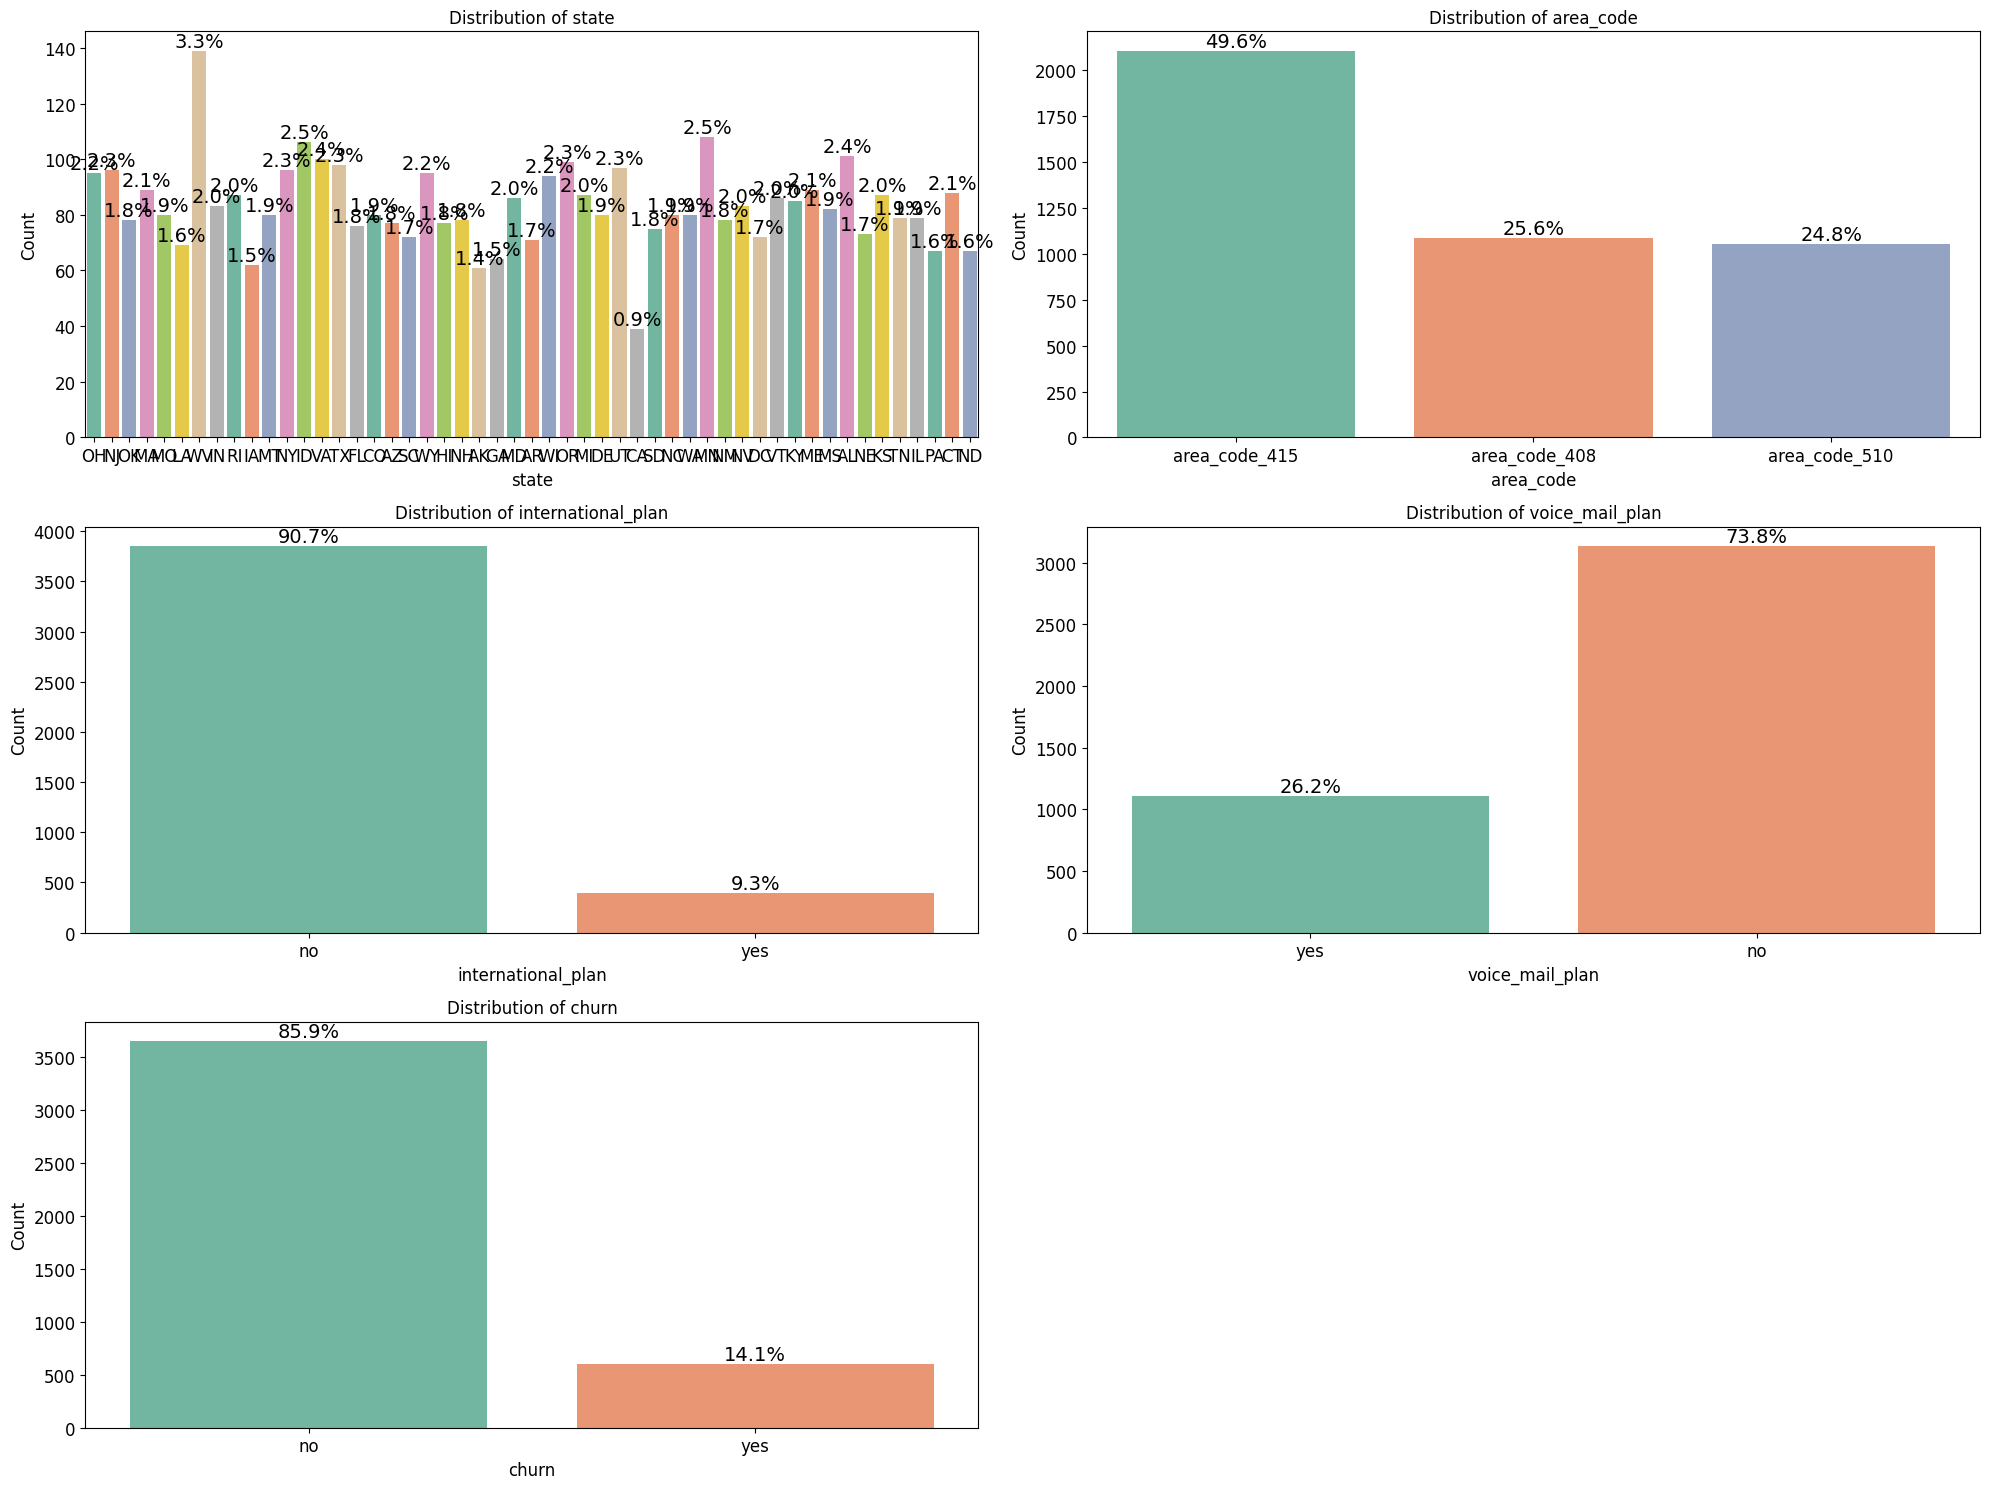

In [62]:
# Create subplots for all categorical variables
n_features = len(cat_columns)  # Number of categorical variables
n_cols = 2  # Number of columns for subplots
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Flatten axes to easily index them

# Loop through each categorical variable and plot
for idx, feature in enumerate(cat_columns):
    ax = axes[idx]
    total = len(df)
    sns.countplot(x=feature, data=df, ax=ax, hue=feature, palette="Set2")
    ax.set_title(f'Distribution of {feature}', fontsize=12)
    ax.set_xlabel(feature, fontsize=12)  # Increase x-label font size
    ax.set_ylabel("Count", fontsize=12)  # Increase y-label font size
    
    # Increase tick label font size
    ax.tick_params(axis='x', labelsize=12)  # Font size for x-axis ticks
    ax.tick_params(axis='y', labelsize=12)  # Font size for y-axis ticks
    with_per(total, ax)  # Annotate percentages

# Remove unused subplots if there are fewer variables than subplot slots
for i in range(len(cat_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust subplot spacing
plt.show()

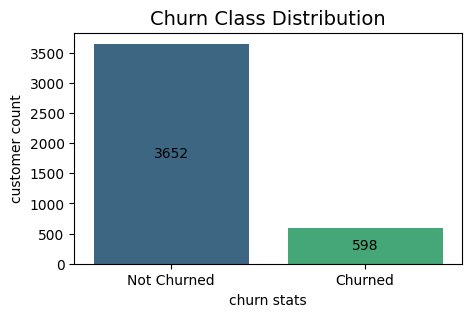

In [63]:
plt.figure(figsize=(5,3))
ax = sns.countplot(x='churn', data=df, hue='churn', palette='viridis')

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.title('Churn Class Distribution', fontsize = 14)
plt.xlabel('churn stats')
plt.ylabel('customer count')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

### Working on Numerical Variables

In [64]:
# selecting numerical variables

df_num = df.select_dtypes(['int', 'float'])

df_num.head(10)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3
5,147,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0
6,117,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
7,141,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0
8,65,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
9,74,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0


In [65]:
num_cols = [feature for feature in df_num.columns]

num_cols

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

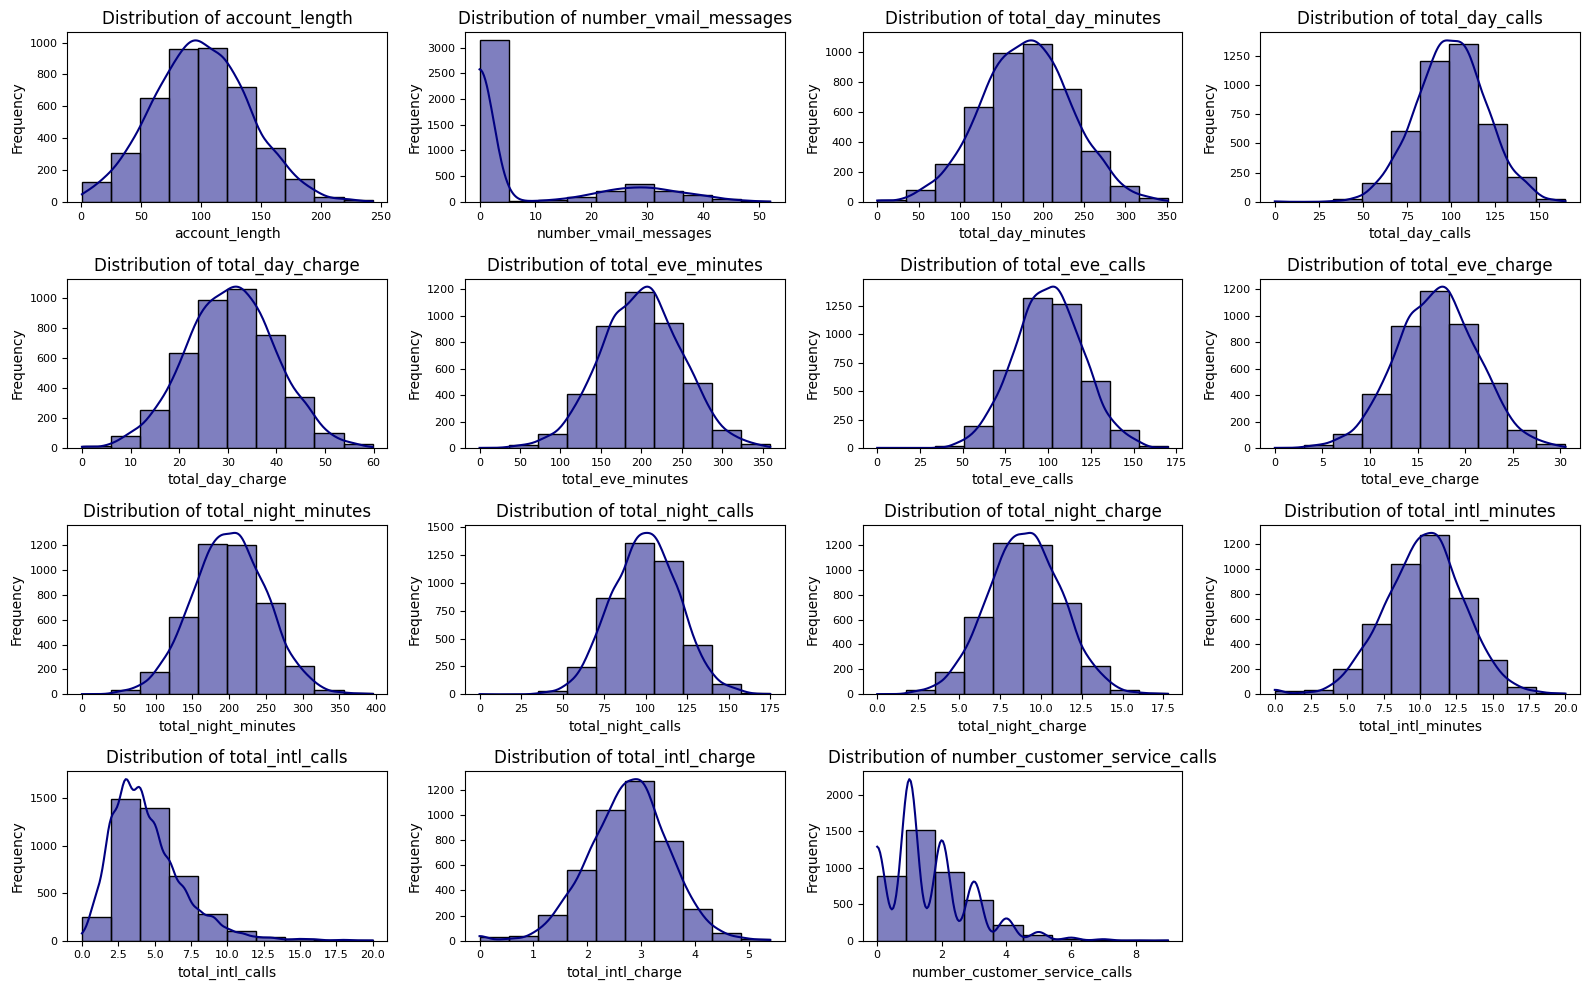

In [66]:
# Assume df_num contains only numerical columns
num_cols = df_num.columns
n_plots = len(num_cols)  # Number of plots (features)
plt_cols = 4             # Number of columns for subplots
plt_rows = int(np.ceil(n_plots / plt_cols))  # Number of rows for subplots

# Create subplots
fig, axes = plt.subplots(plt_rows, plt_cols, figsize=(16, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through numerical columns and plot histogram + KDE
for idx, feature in enumerate(num_cols):
    ax = axes[idx]  # Select the subplot axis
    sns.histplot(df_num[feature], bins=10, kde=True, color='navy', ax=ax)
    ax.set_title(f'Distribution of {feature}', fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.tick_params(axis='both', labelsize=8)

# Remove unused subplots if there are fewer features than subplots
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust spacing and layout
plt.tight_layout()
plt.show()


## Bivariant Analysis

#### Working on categorical variables

C:\Users\DELL\AppData\Local\Temp\ipykernel_27632\3870532699.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  a.legend(fontsize=14)


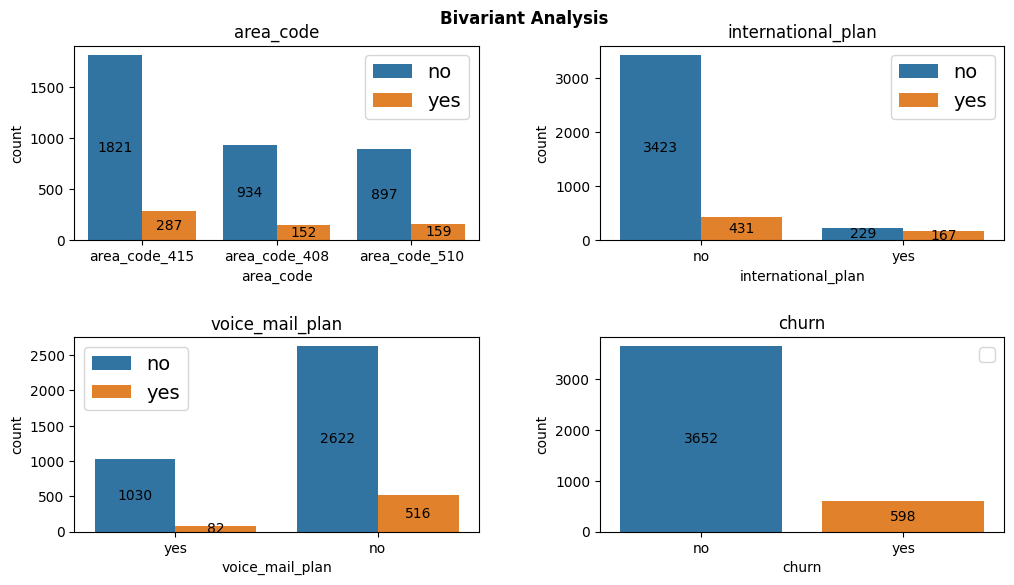

In [67]:
# creating a 2 x 2 grid subplots

fig = plt.figure(figsize=(12,6))
fig.suptitle('Bivariant Analysis', fontsize=12, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, col in enumerate(cat_columns[1:]):
    a = fig.add_subplot(2, 2, i + 1)
    a = sns.countplot(x=df[col], ax=a, hue=df['churn'])
    a.set_title(col)
    a.bar_label(a.containers[0], label_type='center')
    a.bar_label(a.containers[1], label_type='center')
    a.legend(fontsize=14)
    

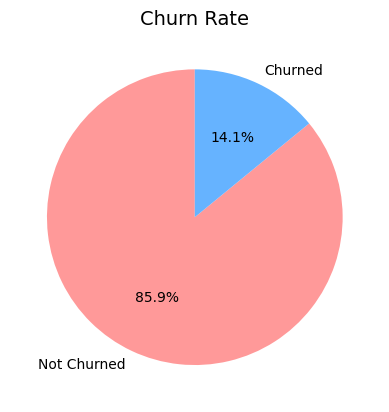

In [68]:
# pic chart for the churn column
churn_rate = df['churn'].value_counts()
churn_rate.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], labels=['Not Churned', 'Churned'])
plt.title('Churn Rate', fontsize=14)
plt.ylabel('')
plt.show()

### Working on Numerical features

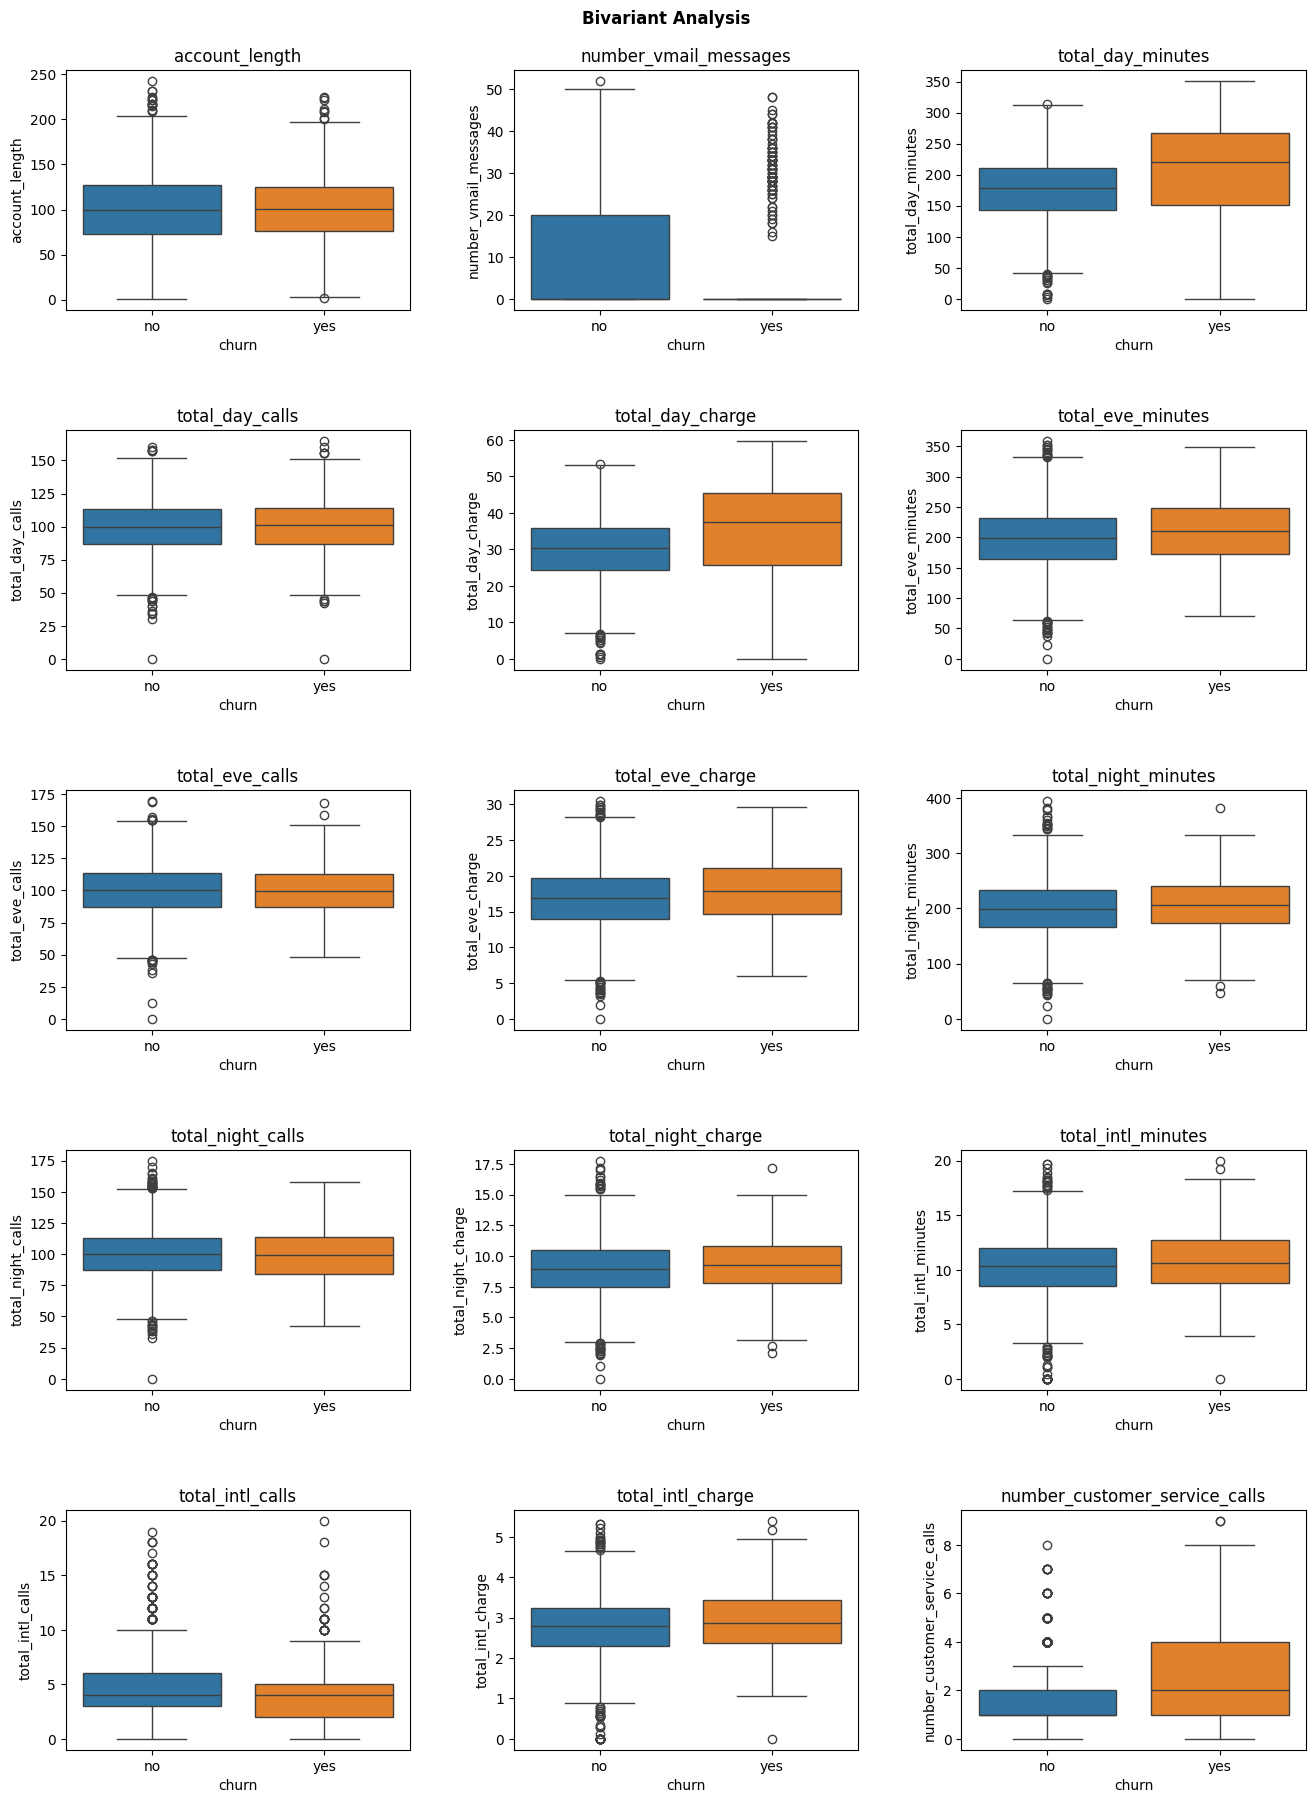

In [69]:
fig = plt.figure(figsize=[16, 20])
fig.suptitle('Bivariant Analysis', fontweight='bold')
fig.subplots_adjust(top=0.95)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, col in enumerate(df_num.columns):
    a = fig.add_subplot(len(num_cols) // 3, 3, i + 1)
    a = sns.boxplot(x='churn', y=col, ax=a, hue='churn', data=df)
    a.set_title(col)
    

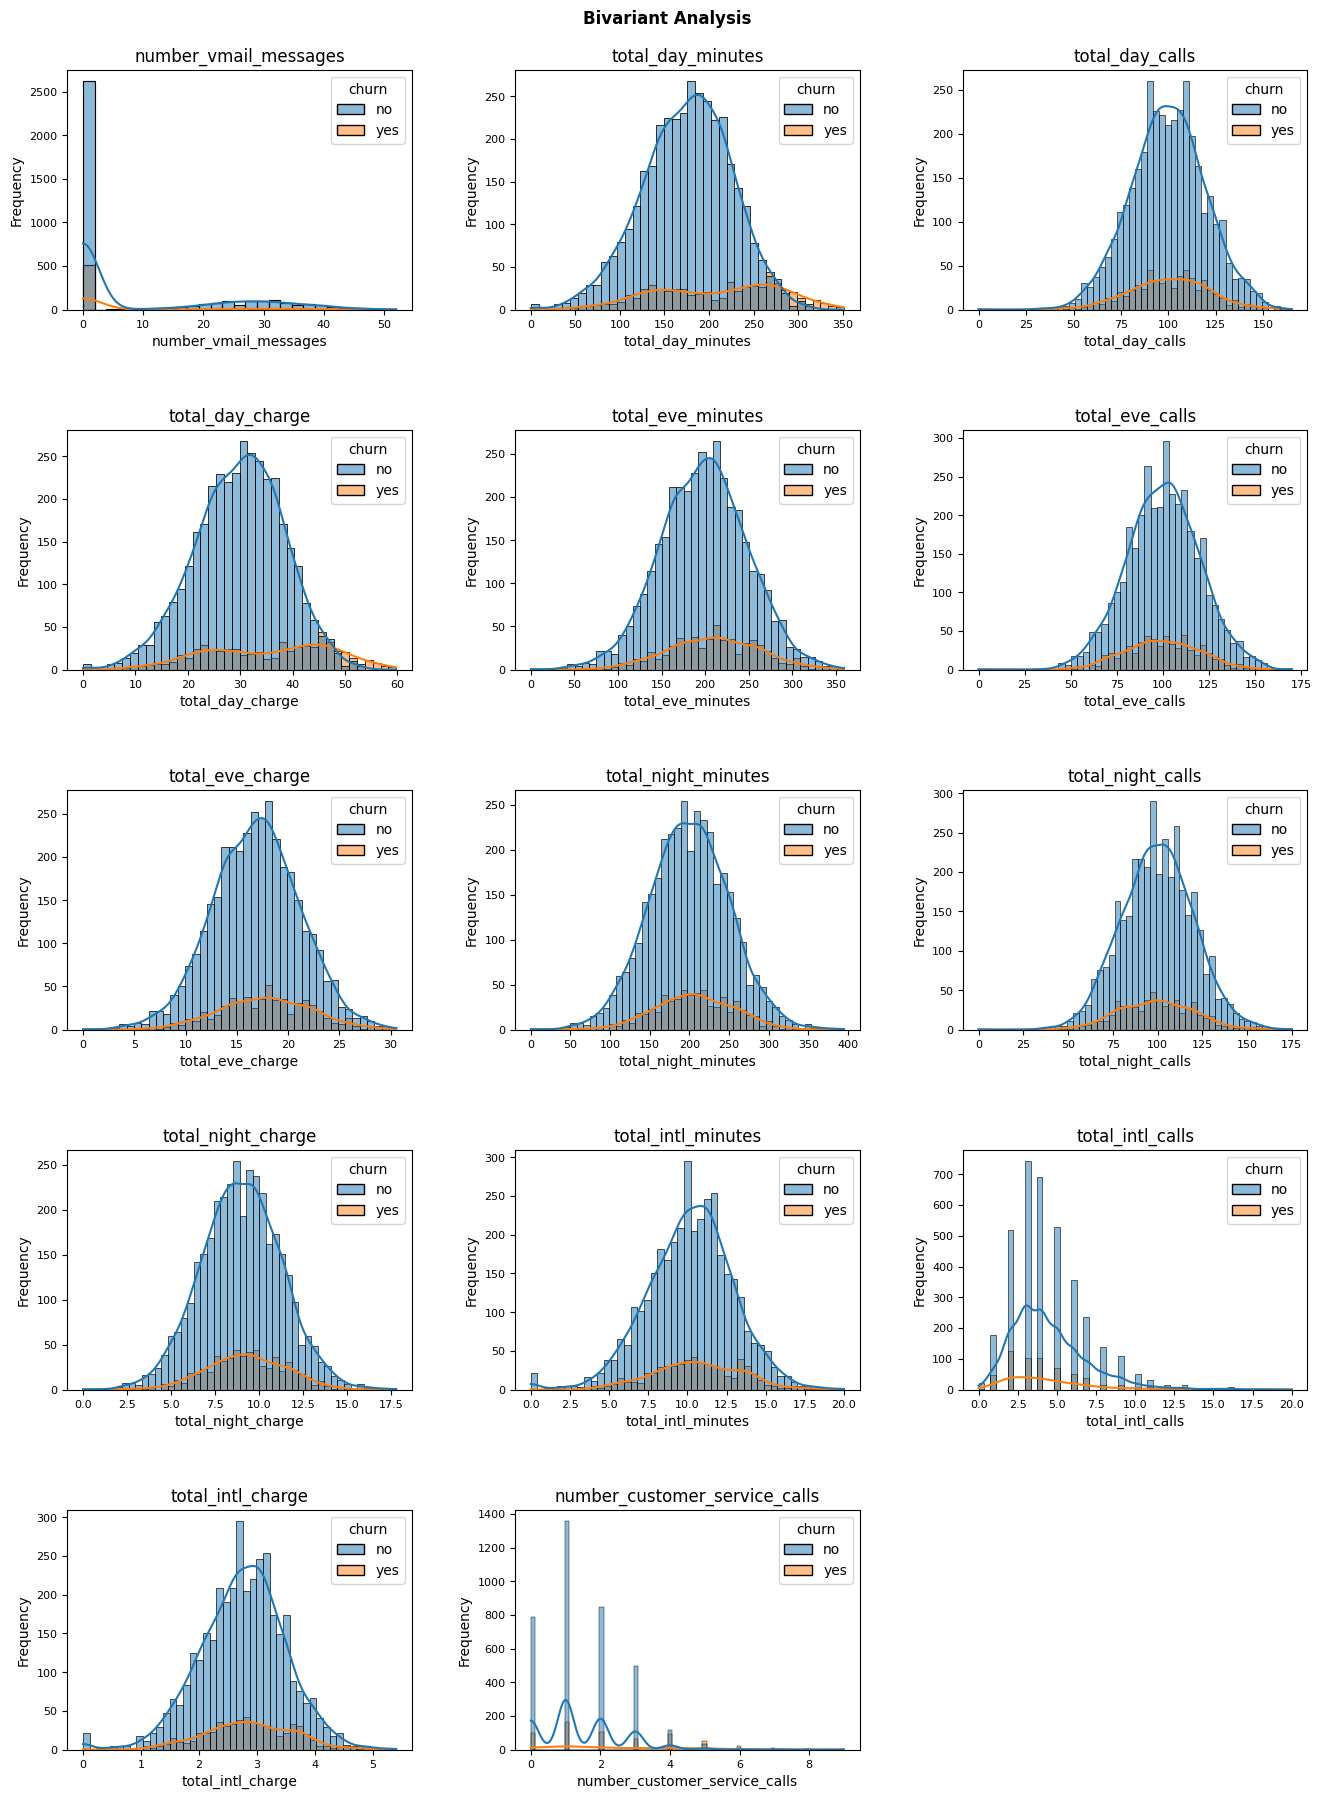

In [70]:
# plotting histogram for numerical columns 
fig = plt.figure(figsize=(16, 20))
fig.suptitle('Bivariant Analysis', fontweight='bold')
fig.subplots_adjust(top=0.95)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, col in enumerate(df_num.columns[1:]):
    a = fig.add_subplot(len(num_cols) // 3, 3, i + 1)
    a = sns.histplot(data=df, x=col, hue='churn', kde=True, ax=a)
    a.set_title(col)
    a.set_xlabel(col)
    a.set_ylabel('Frequency')
    a.tick_params(axis='both', labelsize=8)
    

## Outlier detection

In [71]:
# creating a function to count outliers 

def outlier_table_count(df, columns):
    outlier_counts = []
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        
        outlier_counts.append({'column' : col, 'outlier' : outlier_count})
        
        # if handle_outliers:
        #     # using .clip()
        #     # df[col] = df[col].clip(lower = lower_bound, upper = upper_bound)
            
        #     df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        #     df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
            
    outlier_df = pd.DataFrame(outlier_counts)
    
    return outlier_df


outlier_table_count(df_num, df_num.columns)
        
        
        


,column,outlier
0,account_length,20
1,number_vmail_messages,86
2,total_day_minutes,25
3,total_day_calls,28
4,total_day_charge,26
5,total_eve_minutes,34
6,total_eve_calls,24
7,total_eve_charge,34
8,total_night_minutes,37
9,total_night_calls,33


### Visualize Outliers using box plot

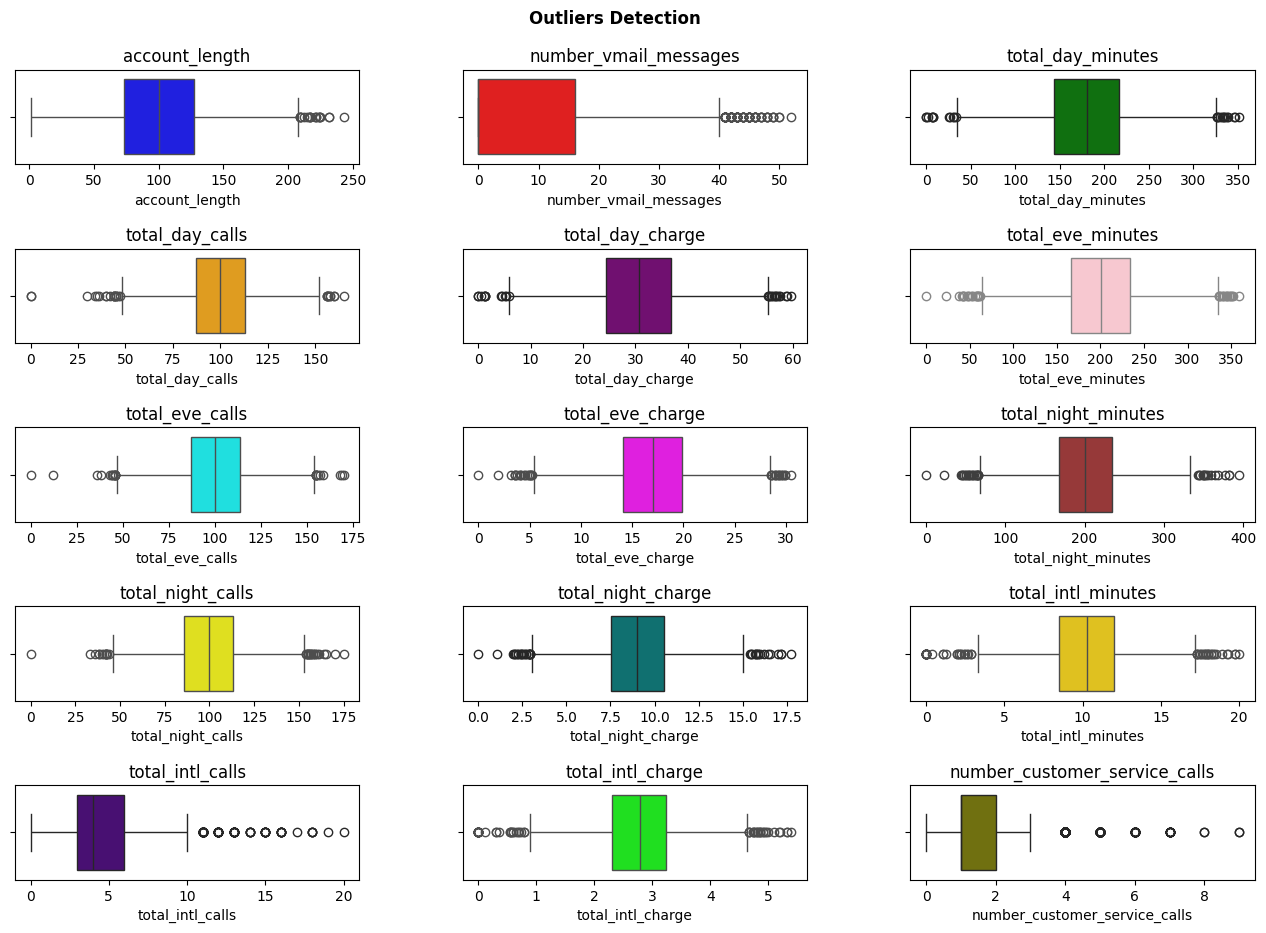

In [72]:
colors = [
    'blue', 'red', 'green', 'orange', 'purple', 'pink', 
    'cyan', 'magenta', 'brown', 'yellow', 'teal', 'gold', 
    'indigo', 'lime', 'olive', 'coral', 'skyblue', 'lightgreen', 
    'darkred', 'darkblue', 'darkgreen', 'gray', 'black', 'white'
]

fig = plt.figure(figsize=[16,10])
fig.suptitle('Outliers Detection', fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.9, wspace=0.3)

for i, col in enumerate(num_cols):
    ax1 = fig.add_subplot(len(num_cols) // 3, 3, i + 1)
    ax1 = sns.boxplot(x=col, ax=ax1, data=df, color=colors[i])
    
    # set title and label
    ax1.set_title(col)
    ax1.set_xlabel(col)

In [73]:
def handle_outliers(df):
    for col in df.select_dtypes(['int', 'float']).columns[1:]:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)
        
    return df

handle_outliers(df)
        

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.50,103.0,16.620,254.4,103.0,11.45,13.7,3.0,3.70,1.0,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.20,110.0,10.300,162.6,104.0,7.32,12.2,5.0,3.29,0.0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,64.15,88.0,5.455,196.9,89.0,8.86,6.6,7.0,1.78,2.0,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.30,122.0,12.610,186.9,121.0,8.41,10.1,3.0,2.73,3.0,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,335.55,108.0,28.515,212.6,118.0,9.57,7.5,7.0,2.03,3.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.80,88.0,20.720,213.7,79.0,9.62,10.3,6.0,2.78,0.0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.20,82.0,11.150,186.2,89.0,8.38,11.5,6.0,3.11,3.0,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.10,126.0,16.410,129.1,104.0,5.81,6.9,7.0,1.86,1.0,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.00,126.0,18.960,297.5,116.0,13.39,9.9,5.0,2.67,2.0,no


In [74]:
outlier_table_count(df_num, num_cols)

,column,outlier
0,account_length,20
1,number_vmail_messages,86
2,total_day_minutes,25
3,total_day_calls,28
4,total_day_charge,26
5,total_eve_minutes,34
6,total_eve_calls,24
7,total_eve_charge,34
8,total_night_minutes,37
9,total_night_calls,33


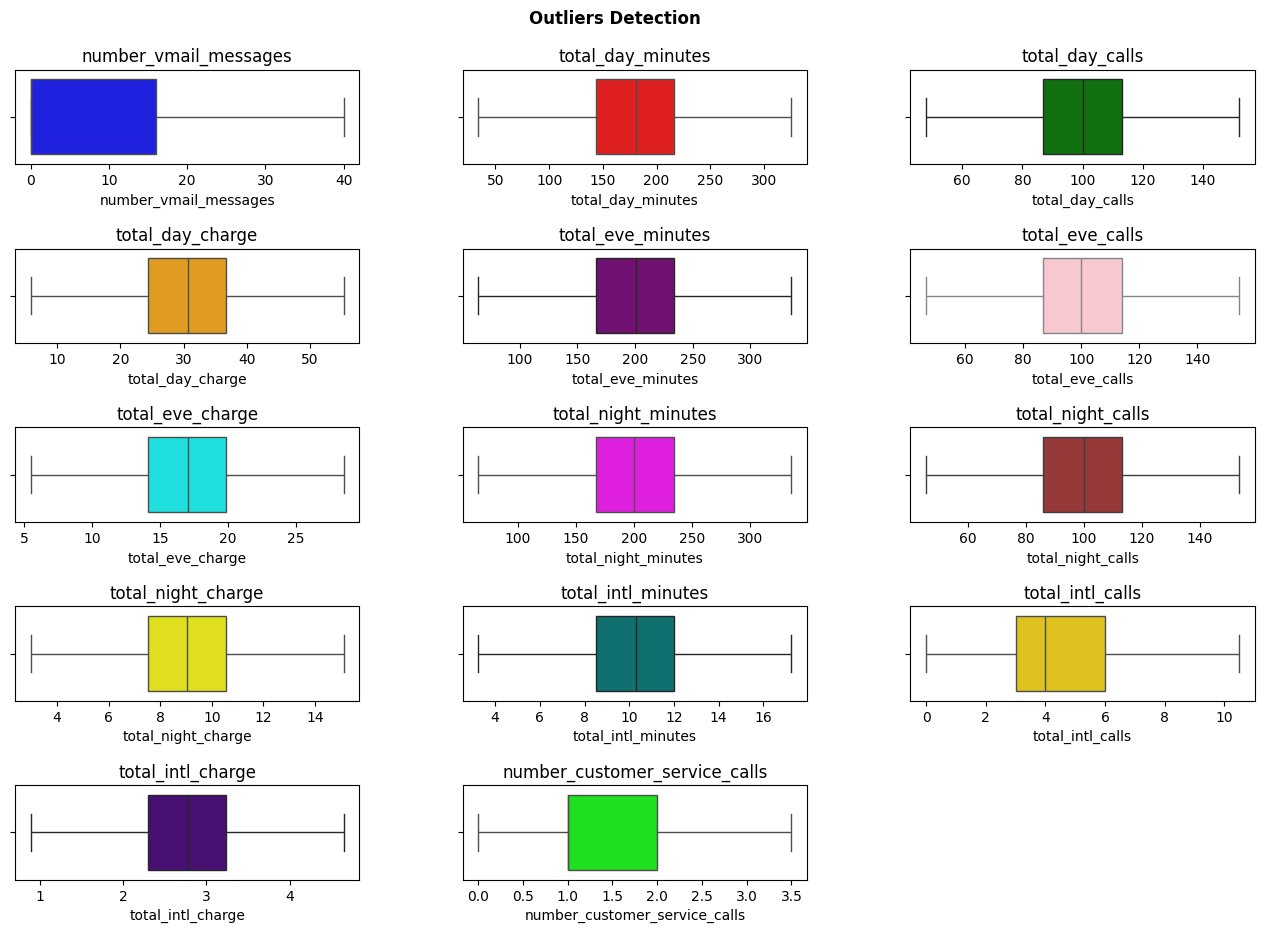

In [75]:
colors = [
    'blue', 'red', 'green', 'orange', 'purple', 'pink', 
    'cyan', 'magenta', 'brown', 'yellow', 'teal', 'gold', 
    'indigo', 'lime', 'olive', 'coral', 'skyblue', 'lightgreen', 
    'darkred', 'darkblue', 'darkgreen', 'gray', 'black', 'white'
]

fig = plt.figure(figsize=[16,10])
fig.suptitle('Outliers Detection', fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.9, wspace=0.3)

for i, col in enumerate(num_cols[1:]):
    ax1 = fig.add_subplot(len(num_cols) // 3, 3, i + 1)
    ax1 = sns.boxplot(x=col, ax=ax1, data=df, color=colors[i])
    
    # set title and label
    ax1.set_title(col)
    ax1.set_xlabel(col)

# Feature Engineering

In [76]:
df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] 
df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

# dropping the columns
df.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes',\
        'total_day_calls', 'total_eve_calls', 'total_night_calls',\
        'total_day_charge', 'total_eve_charge', 'total_night_charge'], axis=1, inplace=True)

In [77]:
# turning to binary
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})

In [78]:
# encoding churn
df['churn'] = df['churn'].map({'yes':1, 'no':0})

In [79]:
# strip off area code
df['area_code'] = df['area_code'].str.split('_').str[-1]

In [80]:
# encoding state column using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['state'] = le.fit_transform(df['state'])

In [81]:
df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_net_minutes,total_net_calls,total_net_charge
0,35,107,415,0,1,26,13.7,3.0,3.70,1.0,0,611.50,329.0,55.540
1,31,137,415,0,0,0,12.2,5.0,3.29,0.0,0,527.20,328.0,59.000
2,35,84,408,1,0,0,6.6,7.0,1.78,2.0,0,560.45,248.0,65.215
3,36,75,415,1,0,0,10.1,3.0,2.73,3.0,0,501.90,356.0,49.360
4,19,121,510,0,1,24,7.5,7.0,2.03,3.0,0,766.35,314.0,75.175
5,24,147,415,1,0,0,7.1,6.0,1.92,0.0,0,471.90,269.0,44.980
6,18,117,408,0,0,0,8.7,4.0,2.35,1.0,0,735.85,267.0,69.595
7,49,141,415,1,1,37,11.2,5.0,3.02,0.0,0,807.00,292.0,77.520
8,15,65,415,0,0,0,12.7,6.0,3.43,3.5,1,566.40,331.0,50.770
9,39,74,415,0,0,0,9.1,5.0,2.46,0.0,0,547.10,369.0,54.620


<Axes: >

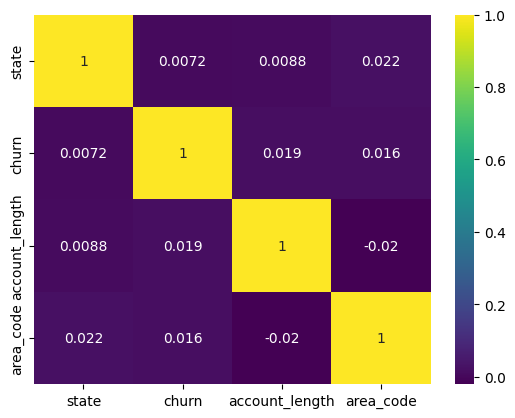

In [82]:
# check correclation between state and churn
corr = df[['state', 'churn', 'account_length', 'area_code']].corr()
sns.heatmap(corr, annot=True, cmap='viridis')

In [83]:
# dropping low correlated features
df.drop(['state', 'account_length', 'area_code'], axis=1, inplace=True)

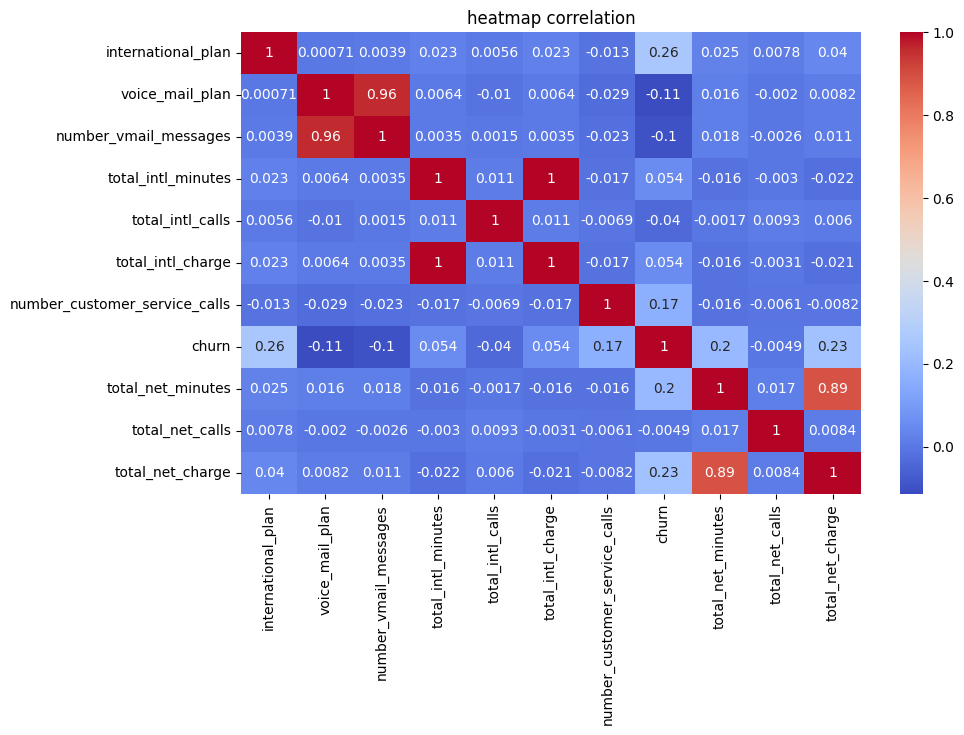

In [84]:
# Check heatmap correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("heatmap correlation")
plt.show()

In [85]:
# save df to processed folder
df.to_csv('../data/processed/train_processed.csv', index=False)